# Group06
- Simão Costa - 20241772
- Leonardo Rodrigues - 20241411
- Jaime Abreu - 20241823
- Murshid Kazi - 20240642

In [64]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import time
import requests
from bs4 import BeautifulSoup

## Data Wrangling and Analysis 

We are going to start our project importing our dataset. We skip the first row because it is empty and we separate every column by '|'.

In [65]:
data=pd.read_csv('city_data.csv',sep='|', skiprows=1)
data.head()

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15 00:00:00
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,NaN,2023-11-03 00:00:00
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,NaN,2023-04-22 00:00:00
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,NaN,2024-08-09 00:00:00
4,"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,120.0,2023-07-17 00:00:00


After that, we analyse our data. We use **.info()** and **.describe()** to get our variable types and more details.

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   City                             86 non-null     object 
 1   Population Density               85 non-null     float64
 2   Population                       86 non-null     int64  
 3   Working Age Population           85 non-null     float64
 4   Youth Dependency Ratio           86 non-null     float64
 5   Unemployment Rate                85 non-null     float64
 6   GDP per Capita                   85 non-null     float64
 7   Days of very strong heat stress  86 non-null     int64  
 8   Main Spoken Languages            85 non-null     object 
 9   Average Monthly Salary           86 non-null     int64  
 10  Avgerage Rent Price              86 non-null     int64  
 11  Average Cost of Living           86 non-null     int64  
 12  Average Price Groceries 

In [67]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
City,86,84,Berlin. Germany,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Population Density,85.0,NaN,NaN,NaN,1115.141176,2542.778533,65.0,304.0,548.0,1020.0,20983.0
Population,86.0,NaN,NaN,NaN,1754370.5,1843133.29993,73895.0,528118.5,1178397.0,2315896.0,12396541.0
Working Age Population,85.0,NaN,NaN,NaN,1158293.623529,1232533.810675,46359.0,358020.0,733794.0,1534225.0,8274794.0
Youth Dependency Ratio,86.0,NaN,NaN,NaN,24.09686,3.266421,19.3,21.425,23.15,25.925,37.8
Unemployment Rate,85.0,NaN,NaN,NaN,6.667059,4.553632,1.4,3.7,5.3,8.1,23.0
GDP per Capita,85.0,NaN,NaN,NaN,51750.269647,21495.617843,10089.92,38664.0,49329.0,63083.0,146094.0
Days of very strong heat stress,86.0,NaN,NaN,NaN,4.348837,10.038476,0.0,0.0,1.0,3.0,59.0
Main Spoken Languages,85,54,Italian,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Monthly Salary,86.0,NaN,NaN,NaN,2434.488372,1188.602984,750.0,1412.5,2400.0,3200.0,6636.0


Now, we start making corrections of our data. 
First we fix typos that we have in the dataset. The first typo is *'Avgerage'*, the second is the empty space at the end of the variable *'Working Age Population'*.
Lastly, we convert the variable *'Last Data Update'* to datetime in order to be possible to work with that later.

In [68]:
data.rename(columns={'Avgerage Rent Price':'Average Rent Price'}, inplace=True)   #fixing typos
data.rename(columns={'Working Age Population ':'Working Age Population'}, inplace=True)

In [69]:
data['Last Data Update'] = pd.to_datetime(data['Last Data Update'], errors='coerce')   #convert to datetime
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   City                             86 non-null     object        
 1   Population Density               85 non-null     float64       
 2   Population                       86 non-null     int64         
 3   Working Age Population           85 non-null     float64       
 4   Youth Dependency Ratio           86 non-null     float64       
 5   Unemployment Rate                85 non-null     float64       
 6   GDP per Capita                   85 non-null     float64       
 7   Days of very strong heat stress  86 non-null     int64         
 8   Main Spoken Languages            85 non-null     object        
 9   Average Monthly Salary           86 non-null     int64         
 10  Average Rent Price               86 non-null     int64         


Now, we checked if we have any duplicates in the data. Since we have, we wrote a block to show us the duplicates.

In [70]:
dupes = data.duplicated(subset=['City'])    #checking if we have duplicates
print("Duplicates found:", dupes.sum())

Duplicates found: 2


In [71]:
data[data.duplicated(subset=['City'], keep=False)].sort_values('City')   #showing the duplicates

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
15,Berlin. Germany,304.0,5303922,3481212.0,21.3,4.7,46548.0,3,"German, Turkish, Arabic, English",3200,1220,2200,NaN,2023-06-29
16,Berlin. Germany,304.0,5303922,3481212.0,21.3,4.7,46548.0,3,"German, Turkish, Arabic, English",3200,1220,2200,NaN,2023-06-29
32,"Malaga, Spain",571.0,869096,585608.0,23.5,17.7,27694.0,0,"Spanish, English",2200,1312,1400,NaN,2023-11-27
33,"Malaga, Spain",571.0,869096,585608.0,23.5,17.7,27694.0,0,"Spanish, English",2200,1312,1400,NaN,2023-11-27


After we checked the duplicates, we deleted them and we made sure that we had no more.

In [72]:
data = data.sort_values('Last Data Update').drop_duplicates(subset=['City'], keep='last')  #deleting the duplicates
print("Duplicates found:", data.duplicated(subset=['City']).sum())  #making sure we don't have any more duplicates

Duplicates found: 0


Next, we looked at the missing values. We have some missing values to work on.

In [73]:
data.isna().sum().sort_values(ascending=False)  #checking missing values

Average Price Groceries            78
Population Density                  1
Working Age Population              1
Unemployment Rate                   1
GDP per Capita                      1
Main Spoken Languages               1
City                                0
Population                          0
Youth Dependency Ratio              0
Days of very strong heat stress     0
Average Monthly Salary              0
Average Rent Price                  0
Average Cost of Living              0
Last Data Update                    0
dtype: int64

First, we dropped the column *'Average Price Groceries'*. It does not make sense to keep it in the dataset. After that, we filled the missing values of the columns *'Population Density'*, *'Working Age Population'*, *'Unemployment Rate'*, *'GDP per Capita'* with the median of the respective columns.

In [74]:
data.drop(columns=['Average Price Groceries'], inplace=True)  #dropping 'Average Price Groceries'

In [75]:
num_cols = ['Population Density', 'Working Age Population', 'Unemployment Rate', 'GDP per Capita']
for col in num_cols:    #filling in the missing values with the median value
    if col in data.columns:
        data[col] = data[col].fillna(data[col].median())

After all this is done, we noticed that the Country and City of each row were in the same column. To make it easier for future analysis, we split both using the **.split()** method by *', '*. Doing this, our new column *'Country'* goes to the end of the dataset on the right. For easier reading, we brought it next to *'City'* in the beggining on the left.

In [76]:
data[['City','Country']]=data['City'].str.split(', ', n=1, expand=True)

In [77]:
#putting the column 'Country' after 'City'
cols=data.columns.tolist()
cols.remove('Country')
cols.insert(cols.index('City')+1, 'Country')
data=data[cols]
data.head()

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
10,Basel,Switzerland,793.0,550152,358020.0,21.5,5.3,94826.0,5,"German, English, French",6366,2500,4239,2023-01-19
20,Frankfurt am Main,Germany,631.0,2710501,1791435.0,22.0,3.2,69372.0,6,"German, English",3800,1300,2350,2023-02-04
82,Gothenburg,Sweden,245.0,1037675,672152.0,28.2,6.3,49588.0,0,"Swedish, English",2500,1200,2100,2023-03-10
18,Munich,Germany,529.0,2907752,1955041.0,21.1,2.1,83965.0,1,"German, English",3540,1500,2550,2023-03-16
59,Venice,Italy,852.0,557748,347781.0,19.3,6.1,39681.0,6,Italian,1400,1150,1500,2023-03-23


With all that done, we looked for any errors that might have occured during the previous phase. As expected we have some problems that need to be fixed.

In [78]:
problem_rows = data[data['Country'].isna()][['City']]
problem_rows

,City
16,Berlin. Germany
12,Lemesos;Cyprus


For this errors, we just applied the same method as previously described. We used **.split()** on those 2 rows but this time we split by *';'* and *'.'*. After, we made sure we had no more errors.

In [79]:
data[['City','Country2']]=data['City'].str.split(';', n=1, expand=True)
data[['City','Country3']]=data['City'].str.split('.', n=1, expand=True)

In [80]:
problem_rows = data[data['Country'].isna()][['City']]  #checking to see if there is any more problems
problem_rows

,City
16,Berlin
12,Lemesos


With that done, we put every Country name in the same column, *'Country'*, and we dropped all the unnecessary columns.

In [81]:
data[['Country', 'Country2', 'Country3']] = data[['Country', 'Country2', 'Country3']].fillna('')
data['Country'] = data[['Country', 'Country2', 'Country3']].apply(lambda x: ', '.join(x[x != '']), axis=1)
data.drop(['Country2', 'Country3'], axis=1, inplace=True)
data.head()

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
10,Basel,Switzerland,793.0,550152,358020.0,21.5,5.3,94826.0,5,"German, English, French",6366,2500,4239,2023-01-19
20,Frankfurt am Main,Germany,631.0,2710501,1791435.0,22.0,3.2,69372.0,6,"German, English",3800,1300,2350,2023-02-04
82,Gothenburg,Sweden,245.0,1037675,672152.0,28.2,6.3,49588.0,0,"Swedish, English",2500,1200,2100,2023-03-10
18,Munich,Germany,529.0,2907752,1955041.0,21.1,2.1,83965.0,1,"German, English",3540,1500,2550,2023-03-16
59,Venice,Italy,852.0,557748,347781.0,19.3,6.1,39681.0,6,Italian,1400,1150,1500,2023-03-23


Looking at the data, we noticed that the rows were all mixed together. It is easier to look at them in an alphabetical order.

In [82]:
data = data.sort_values(by='Country').reset_index(drop=True) #odering the data in alphabetical order
data.index+=1
data.head()

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
1,Lyon,France,10909.0,520774,365824.0,27.31,6.9,46226.0,11,French,2300,1200,1800,2023-03-31
2,Berlin,Germany,304.0,5303922,3481212.0,21.30,4.7,46548.0,3,"German, Turkish, Arabic, English",3200,1220,2200,2023-06-29
3,Greece,Athens,1829.0,3530371,2287174.0,22.00,17.2,38580.0,17,"Greek, English",1050,600,1200,2024-07-16
4,Vienna,Austria,310.0,2983513,2018818.0,20.10,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,2024-06-15
5,Salzburg,Austria,243.0,375489,250472.0,20.30,3.0,66689.0,0,German,3200,1100,2186,2023-11-03


While ordering the dataset, we noticed that there were some Countries that should not be at the top. To correct this, we use the **.strip()** method.

In [83]:
data['Country'] = data['Country'].str.strip()
data = data.sort_values(by='Country').reset_index(drop=True)
data.index+=1
data.head()

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
1,Greece,Athens,1829.0,3530371,2287174.0,22.0,17.2,38580.0,17,"Greek, English",1050,600,1200,2024-07-16
2,Vienna,Austria,310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,2024-06-15
3,Salzburg,Austria,243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,2023-11-03
4,Brussels,Belgium,681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,2023-04-22
5,Antwerp,Belgium,928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,2024-08-09


After doing this, we noticed one more error. In the first row, the City and Country names are swapped. We need to fix this.

In [84]:
row=1
data.at[row, 'City'], data.at[row, 'Country'] = data.at[row, 'Country'], data.at[row, 'City']
data.head()

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
1,Athens,Greece,1829.0,3530371,2287174.0,22.0,17.2,38580.0,17,"Greek, English",1050,600,1200,2024-07-16
2,Vienna,Austria,310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,2024-06-15
3,Salzburg,Austria,243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,2023-11-03
4,Brussels,Belgium,681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,2023-04-22
5,Antwerp,Belgium,928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,2024-08-09


Now, we order it again by *'Country'* and *'City'*.

In [85]:
data = data.sort_values(by=['Country','City']).reset_index(drop=True) #odering the data in alphabetical order (Country and City)
data.index+=1
data.head()

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
1,Salzburg,Austria,243.0,375489,250472.0,20.30,3.0,66689.0,0,German,3200,1100,2186,2023-11-03
2,Vienna,Austria,310.0,2983513,2018818.0,20.10,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,2024-06-15
3,Antwerp,Belgium,928.0,1139663,723396.0,27.70,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,2024-08-09
4,Bruges,Belgium,840.0,119765,74600.0,25.63,5.6,63083.0,0,"Dutch, French",2700,1250,1708,2023-10-25
5,Brussels,Belgium,681.0,3284548,2137425.0,27.50,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,2023-04-22


Now, we want to make sure one last time that our data is pre-processed and that we don't have missing values. Unfornately, there is still one missing value.

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 1 to 84
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   City                             84 non-null     object        
 1   Country                          84 non-null     object        
 2   Population Density               84 non-null     float64       
 3   Population                       84 non-null     int64         
 4   Working Age Population           84 non-null     float64       
 5   Youth Dependency Ratio           84 non-null     float64       
 6   Unemployment Rate                84 non-null     float64       
 7   GDP per Capita                   84 non-null     float64       
 8   Days of very strong heat stress  84 non-null     int64         
 9   Main Spoken Languages            83 non-null     object        
 10  Average Monthly Salary           84 non-null     int64         


Since it is on a categorical column, we created a specific label for it called '*Unknown'*. We checked again for any problems and we  have everything in place.

In [87]:
object_col = data.select_dtypes(include='object').columns
data[object_col] = data[object_col].fillna("Unknown")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 1 to 84
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   City                             84 non-null     object        
 1   Country                          84 non-null     object        
 2   Population Density               84 non-null     float64       
 3   Population                       84 non-null     int64         
 4   Working Age Population           84 non-null     float64       
 5   Youth Dependency Ratio           84 non-null     float64       
 6   Unemployment Rate                84 non-null     float64       
 7   GDP per Capita                   84 non-null     float64       
 8   Days of very strong heat stress  84 non-null     int64         
 9   Main Spoken Languages            84 non-null     object        
 10  Average Monthly Salary           84 non-null     int64         


With the data finally pre-processed, we are going to answer the questions now.

### Question 1 - How did you handle missing values and duplicate records in the dataset? Justify your approach.

To take care of the missing values, we substitute them with the median for the numerical values because it represents better the skewness than the mean. For the categorical values we imputed a dedicated label called "Unknown" to preserve the information from the missing values. In the case of the column 'Average Price Groceries', we just deleted it from our dataset because it is not valuable since we only had 6 values.

The duplicated values were identified and removed since they don't have any additional information.

### Question 2

### a) Which country appears most frequently in the dataset? How many cities areassociated with it?

In [88]:
country_counts = data['Country'].value_counts()  # counting how many times each country appears in the dataset
top_country = country_counts.idxmax()    # getting the most frequent country
num_cities = country_counts.max()        # getting the numbers of city the country has in the dataset
print(f"Country with most cities: {top_country}, with {num_cities} cities")

Country with most cities: Germany, with 10 cities


### b) How many cities are present in total? How many are associated with Greece?

In [89]:
print(f"We have {data['City'].nunique()} cities, which {data[data['Country']=='Greece']['City'].nunique()} are in Greece")

We have 84 cities, which 2 are in Greece


### c) Which is the least spoken language in the dataset? Which are the top 3 most spoken languages?

For this question, we considered the least spoken languages the ones that are talked in the least number of cities.

In [90]:
data['Main Spoken Languages']= data['Main Spoken Languages'].str.replace(';', ',')
data_exploded = data.assign(Languages=data['Main Spoken Languages'].str.split(',')).explode('Languages')
data_exploded['Languages'] = data_exploded['Languages'].str.strip()
language_counts = data_exploded['Languages'].value_counts()
language_counts= language_counts.drop('Unknown', errors= 'ignore')
least_spoken = []
for language, count in language_counts.items():
    if count==1:
        least_spoken.append(language)

In [91]:
top_3 = language_counts.head(3)
languages_t3 = ', '.join(top_3.index)+ '.'   # join the index (language names) with commas
print(f'The 3 most spoken languages are: {languages_t3}')

The 3 most spoken languages are: English, German, Turkish.


In [92]:
languages_l=', '.join(least_spoken)+ '.'
print("The least spoken languages are", languages_l)

The least spoken languages are Serbian, Scots, Scots Gaelic, Valencian, Catalan, Romanian, Slovene, Slovak, Maltese, Luxembourgish, Latvian, Estonian, Bengali.


### Question 3

### a) Entries uploaded before April 2023 need to be updated. Which cities would require an update?

In [93]:
to_upload = data[data['Last Data Update'] < "2023-04-01"]
update=', '.join(to_upload['City'])+ '.'
print(f'These cities require an update: {update}')

These cities require an update: Lyon, Frankfurt am Main, Munich, Venice, Gothenburg, Basel.


### b) How many days ago was the last update? On what day, month, and year did it occur?

In [125]:
last_update = data['Last Data Update'].max()
print(f'The last update was in {last_update.day} {last_update.strftime("%B")} {last_update.year}.')

The last update was in 12 December 2024.


### Question 4

### a) How are the Unemployment Rate and GDP per Capita distributed and related? What does this relationship suggest? Provide a visual representation.

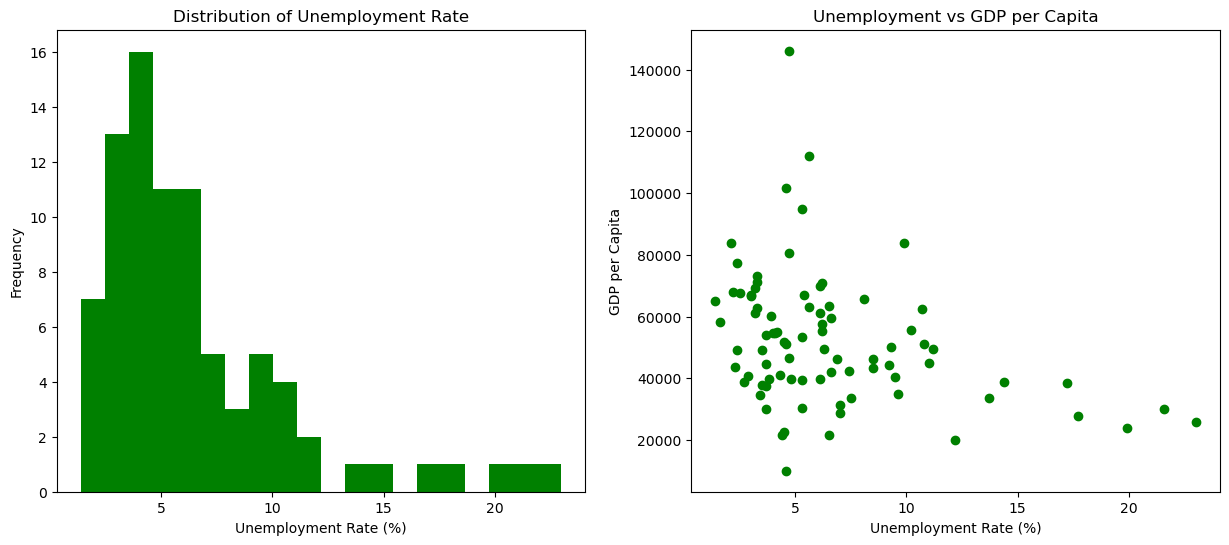

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))

axes[0].hist(data['Unemployment Rate'], bins=20, color='green')
axes[0].set_title('Distribution of Unemployment Rate')
axes[0].set_xlabel('Unemployment Rate (%)')
axes[0].set_ylabel('Frequency')

axes[1].scatter(data['Unemployment Rate'], data['GDP per Capita'], color='green')
axes[1].set_title('Unemployment vs GDP per Capita')
axes[1].set_xlabel('Unemployment Rate (%)')
axes[1].set_ylabel('GDP per Capita')

plt.show()

In [96]:
corr = data['Unemployment Rate'].corr(data['GDP per Capita'])
print("The correlation has a value of", corr)

The correlation has a value of -0.3392607671353986


### b) Which are the top 5 cities with the largest difference between the Average Monthly Salary and Average Cost of Living? What about the top 5 countries with the smallest average difference? Show these results with meaningful visualizations.

In [97]:
data['Difference'] = data['Average Monthly Salary'] - data['Average Cost of Living']
top10_cities = data.nlargest(10, 'Difference')[['City','Difference']]
country_diff = data.groupby('Country')['Difference'].mean().sort_values()
top10_countries = country_diff.head(10)

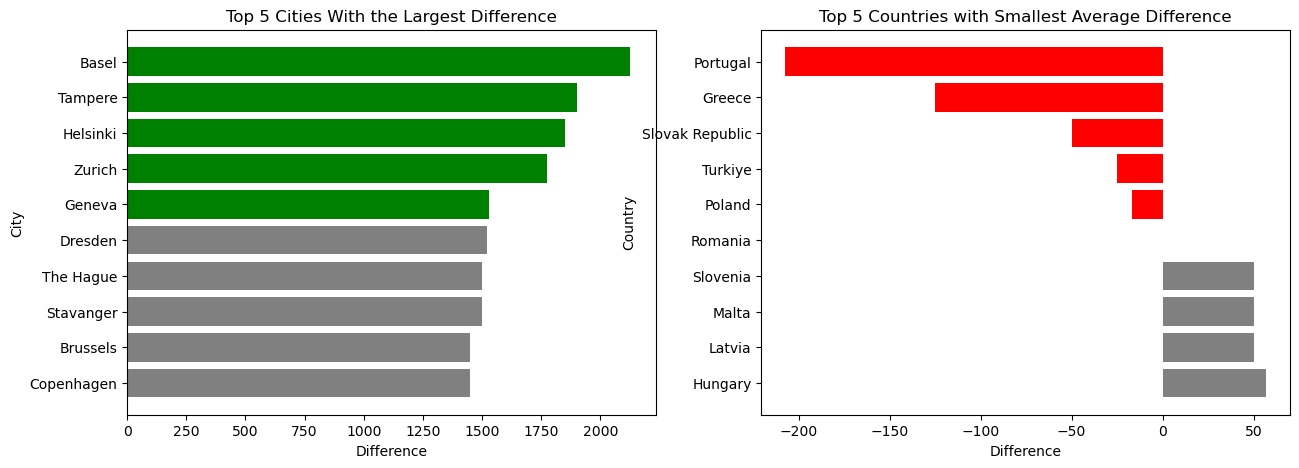

In [98]:
# Create figure with 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15,5))   # width=15, height=5

#left barchart
colors = ['green']*5 + ['grey']*5
axes[0].barh(top10_cities['City'], top10_cities['Difference'], color=colors)
axes[0].invert_yaxis()
axes[0].set_title('Top 5 Cities With the Largest Difference')
axes[0].set_xlabel('Difference')
axes[0].set_ylabel('City')

#right barchart
colors=['red']*5 + ['grey']*5
axes[1].barh(top10_countries.index, top10_countries.values, color=colors)
axes[1].invert_yaxis()
axes[1].set_title('Top 5 Countries with Smallest Average Difference')
axes[1].set_xlabel('Difference')
axes[1].set_ylabel('Country')

plt.show()

### c) Which is the best city for someone seeking: 
- #### an average monthly salary above €2000,
- #### a cost of living below or equal to €1600, and
- #### the lowest unemployment rate possible?

In [99]:
filtered = data[(data['Average Monthly Salary'] > 2000) & (data['Average Cost of Living'] <= 1600)]
best = filtered.sort_values('Unemployment Rate').head(1)
if filtered.empty:
    print("No city meets all criteria")
print(f'The best city for this specific criteria is {best['City'].values[0]}.')

The best city for this specific criteria is Dresden.


### Question 5 - What are three additional insights you find meaningful when comparing the given cities?

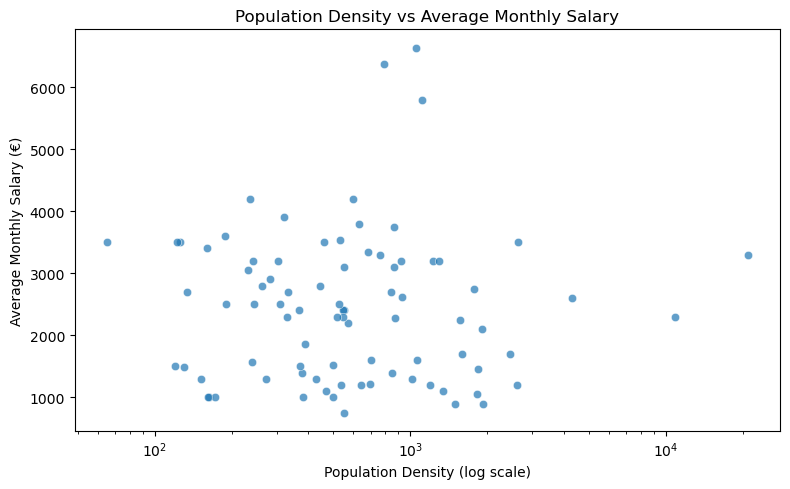

In [132]:
#someone please do this
#maybe create a relation between the weather and something else

#insight 1

plt.figure(figsize=(8,5))
sns.scatterplot(
    data=data,
    x="Population Density",
    y="Average Monthly Salary",
    alpha=0.7
)
plt.xscale("log")
plt.xlabel("Population Density (log scale)")
plt.ylabel("Average Monthly Salary (€)")
plt.title("Population Density vs Average Monthly Salary")
plt.tight_layout()
plt.show()

The relationship between population density and average salary is weak, suggesting that higher population density alone does not guarantee higher wages. While some dense metropolitan areas offer higher salaries, many medium-density cities provide comparable income levels.

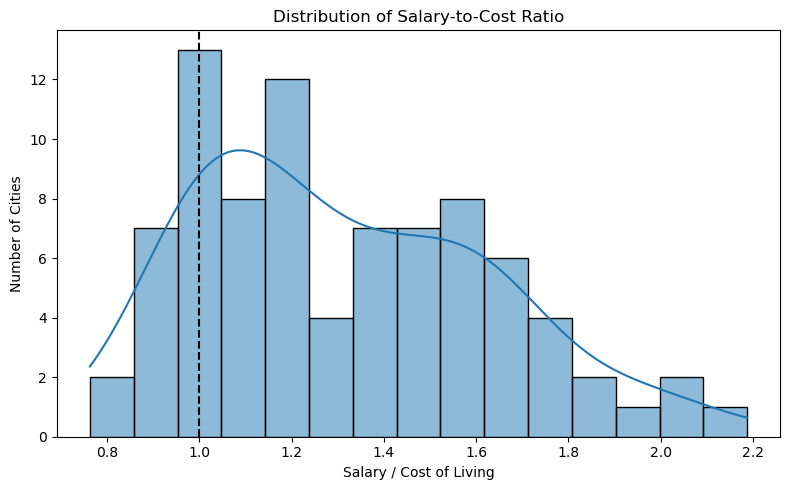

In [133]:
#insight 2 
plt.figure(figsize=(8,5))
sns.histplot(data["Salary_to_Cost_Ratio"], kde=True, bins=15)
plt.axvline(1, linestyle="--", color="black")
plt.title("Distribution of Salary-to-Cost Ratio")
plt.xlabel("Salary / Cost of Living")
plt.ylabel("Number of Cities")
plt.tight_layout()
plt.show()

The salary-to-cost ratio reveals substantial differences in affordability across cities. While many cities cluster around a ratio close to 1, only a small number offer salaries that significantly exceed living costs, highlighting limited affordability even among higher-income cities

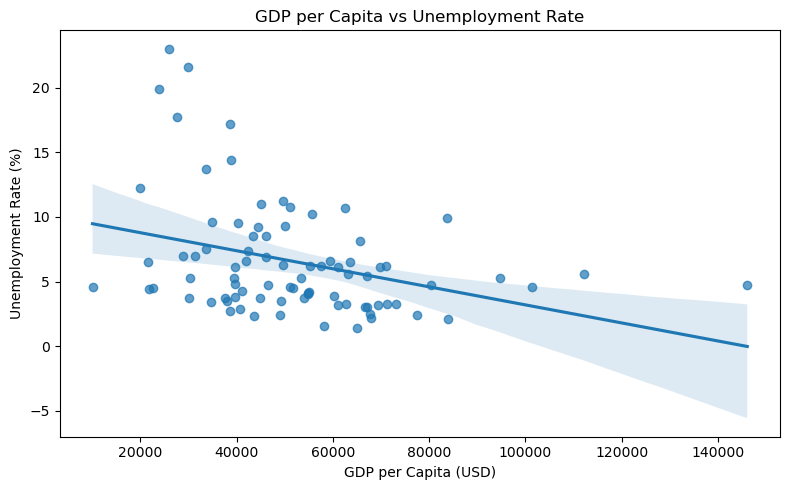

In [138]:
#insight 3, depois so confirmar os 3 pra ter certeza ( simao look at this )
plt.figure(figsize=(8,5))
sns.regplot(
    data=data,
    x="GDP per Capita",
    y="Unemployment Rate",
    scatter_kws={"alpha": 0.7}
)
plt.xlabel("GDP per Capita (USD)")
plt.ylabel("Unemployment Rate (%)")
plt.title("GDP per Capita vs Unemployment Rate")
plt.tight_layout()
plt.show()

Cities with higher GDP per capita generally exhibit lower unemployment rates, indicating that stronger economic output is associated with healthier labor markets. However, the dispersion of points suggests that GDP alone does not fully explain employment outcomes.

## Building an Interactive Map

In this part, our goal is to create an interactive map of **Europe**. For that we need the coordinates of every city in our dataset. We can get the coordinates using **Web Scraping**.

### Web Scrapping

Let's get the coordinates of every city. For that, it is mandatory that we start from the main link of **Wikipedia** which is *https://en.wikipedia.org/wiki/Main_Page*.

In [103]:
link='https://en.wikipedia.org/wiki/Main_Page'
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"}
r=requests.get(link, headers=headers)
soup=BeautifulSoup(r.text, 'html.parser')

In [140]:
#fix this, check classes code

In [105]:
def find_city_page(city, country):
    search_query = f"{city} {country}".replace(" ", "+")
    search_url = f"https://en.wikipedia.org/w/index.php?search={search_query}"
    
    r = requests.get(search_url, headers=headers)
    soup = BeautifulSoup(r.text, "html.parser")

    # 1. Try direct redirect: canonical link
    canonical = soup.select_one('link[rel="canonical"]')
    if canonical:
        page_url = canonical.get("href")
        if "wiki" in page_url and "search" not in page_url:
            return page_url

    # 2. Try normal search results
    result = soup.select_one(".mw-search-result-heading a")
    if result:
        return "https://en.wikipedia.org" + result.get("href")

    return None

In [106]:
def get_coordinates(url):
    r = requests.get(url, headers=headers)
    soup = BeautifulSoup(r.text, "html.parser")
    
    coord_tag = soup.select_one(".geo")
    if coord_tag:
        lat, lon = coord_tag.text.split(";")
        return float(lat.strip()), float(lon.strip())
    
    return None, None

In [107]:
def scrape_city_coordinates(city, country):
    page_url = find_city_page(city, country)
    if page_url is None:
        return None, None
    
    return get_coordinates(page_url)

In [108]:
data['Latitude'] = None
data['Longitude'] = None

Let's scrap the coordinates!

In [109]:
import time

for idx, row in data.iterrows():
    city = row['City']
    country = row['Country']

    # Skip rows already scraped (useful if rerunning)
    if pd.notna(row['Latitude']) and pd.notna(row['Longitude']):
        continue

    print(f"Scraping {city}, {country}...")

    lat, lon = scrape_city_coordinates(city, country)

    data.loc[idx, 'Latitude'] = lat
    data.loc[idx, 'Longitude'] = lon

    time.sleep(1)  # polite delay

Scraping Salzburg, Austria...
Scraping Vienna, Austria...
Scraping Antwerp, Belgium...
Scraping Bruges, Belgium...
Scraping Brussels, Belgium...
Scraping Gent, Belgium...
Scraping Dobrich, Bulgaria...
Scraping Sofia, Bulgaria...
Scraping Split, Croatia...
Scraping Zagreb, Croatia...
Scraping Lefkosia, Cyprus...
Scraping Lemesos, Cyprus...
Scraping Ostrava, Czechia...
Scraping Prague, Czechia...
Scraping Copenhagen, Denmark...
Scraping Odense, Denmark...
Scraping Tallinn, Estonia...
Scraping Helsinki, Finland...
Scraping Tampere, Finland...
Scraping Lyon, France...
Scraping Paris, France...
Scraping Toulouse, France...
Scraping Berlin, Germany...
Scraping Cologne, Germany...
Scraping Dresden, Germany...
Scraping Dusseldorf, Germany...
Scraping Frankfurt am Main, Germany...
Scraping Hamburg, Germany...
Scraping Hanover, Germany...
Scraping Leipzig, Germany...
Scraping Munich, Germany...
Scraping Stuttgart, Germany...
Scraping Athens, Greece...
Scraping Thessaloniki, Greece...
Scraping Bu

Let's check if we have any city that it wasn't possible to get the coordinates.

In [110]:
failed = data[data['Latitude'].isna() | data['Longitude'].isna()]
failed[['City','Country']]

,City,Country
13,Ostrava,Czechia


Looks like we have. Let's try to get the coordinates in a different way. Instead of going by *'Country'* and *'City'*, let's search using only the *'City'*.

In [111]:
def scrape_with_relaxed_search(city):
    page_url = find_city_page(city, "")
    if page_url:
        lat, lon = get_coordinates(page_url)
        
        # Insert directly into dataset
        data.loc[data['City'] == city, 'Latitude'] = lat
        data.loc[data['City'] == city, 'Longitude'] = lon
        
        return lat, lon
    
    return None, None

In [112]:
print(scrape_with_relaxed_search('Ostrava'))

(49.83556, 18.2925)


Perfect! We got all the coordinates. Now let's export a CSV File of our dataset with the coordinates of each city.

In [113]:
data.to_csv("city_data_with_coordinates.csv", index=False)
data.head()

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update,Difference,Salary_to_Cost_Ratio,Latitude,Longitude
1,Salzburg,Austria,243.0,375489,250472.0,20.30,3.0,66689.0,0,German,3200,1100,2186,2023-11-03,1014,1.463861,47.8,13.045
2,Vienna,Austria,310.0,2983513,2018818.0,20.10,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,2024-06-15,439,1.213003,48.20833,16.3725
3,Antwerp,Belgium,928.0,1139663,723396.0,27.70,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,2024-08-09,656,1.335893,51.21778,4.40028
4,Bruges,Belgium,840.0,119765,74600.0,25.63,5.6,63083.0,0,"Dutch, French",2700,1250,1708,2023-10-25,992,1.580796,51.20889,3.22417
5,Brussels,Belgium,681.0,3284548,2137425.0,27.50,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,2023-04-22,1450,1.763158,50.84667,4.3525


### Interactive Map

In [114]:
import folium
import pandas as pd

# --- Europe bounding box (strict limits) ---
south_west = [34.0, -25.0]  
north_east = [72.0, 45.0]    

# --- Create the map locked to Europe ---
m = folium.Map(
    location=[54.5260, 15.2551],   # center of Europe
    zoom_start=4,
    min_zoom=4,                    # user cannot zoom out too far
    max_zoom=12,
    max_bounds=True                # lock map to bounding box
)

# --- Apply the bounding box ---
m.fit_bounds([south_west, north_east])
m.options['maxBounds'] = [south_west, north_east]
m.options['maxBoundsViscosity'] = 1.0   # prevents sliding outside boundaries

# --- Add markers for each city ---
for idx, row in data.iterrows():
    lat = row['Latitude']
    lon = row['Longitude']

    # Skip if missing coordinates
    if pd.isna(lat) or pd.isna(lon):
        continue

    city = row['City']
    country = row['Country']

    popup_text = f"""
    <b>{city}, {country}</b><br>
    Population: {row['Population']}<br>
    Avg Monthly Salary: {row['Average Monthly Salary']} €<br>
    Avg Cost of Living: {row['Average Cost of Living']} €
    """

    folium.Marker(
        location=[lat, lon],
        tooltip=city,
        popup=folium.Popup(popup_text, max_width=300)
    ).add_to(m)

# --- Display map ---
m

In [115]:
m.save("europe_city_map.html")

## Data Science In Action

### Recommendation System

In [116]:
def recommend_cities(
    min_salary=2000,
    max_cost=1600,
    max_unemployment=8.0,
    max_heat_days=30,
    top_n=5
): # giving default values in case the user doesn't give any
   
    # work on a copy to avoid modifying original data
    rec = data.copy()

    # drop rows with missing values in the relevant columns
    # not really necessary because the dataset doesn't have missing values, just in case of changes in the dataset
    rec = rec.dropna(
        subset=[
            "Average Monthly Salary",
            "Average Cost of Living",
            "Unemployment Rate",
            "Days of very strong heat stress",
        ]
    )

    # apply user filters
    mask = (
        (rec["Average Monthly Salary"] >= min_salary)
        & (rec["Average Cost of Living"] <= max_cost)
        & (rec["Unemployment Rate"] <= max_unemployment)
        & (rec["Days of very strong heat stress"] <= max_heat_days)
    )

    rec = rec[mask]

    if rec.empty:
        print("No city matches the selected criteria.\n"
        "Try relaxing one or more constrains.")
        return rec

    # ordering the results from best to worst using these criterias: high salary, low cost, low unemployment
    rec = rec.sort_values(
        by=["Average Monthly Salary", "Average Cost of Living", "Unemployment Rate"],
        ascending=[False, True, True],
    )

    # select columns to display
    columns_to_show = [
        "City",
        "Country",
        "Average Monthly Salary",
        "Average Cost of Living",
        "Unemployment Rate",
        "Days of very strong heat stress",
        "Population",
    ]


    # only keep columns that actually exist
    # again, only needed if the dataset is changed
    columns_to_show = [c for c in columns_to_show if c in rec.columns]

    return rec[columns_to_show].head(top_n)

In [117]:
def get_numeric_input(prompt, cast_type=float):
    # making sure we get correct values for each variable
    while True:
        try:
            return cast_type(input(prompt))
        except ValueError:
            print("Invalid input. Please enter a number.")

user_expected_sal = get_numeric_input("Minimum monthly salary (€): ", int)
user_maximum_cost = get_numeric_input("Maximum cost of living (€): ", int)
user_unemployment_rate = get_numeric_input("Maximum unemployment rate (%): ", float)
user_heat_days = get_numeric_input("Maximum number of heat stress days per year: ", int)
user_n_cities = get_numeric_input("Number of cities to display: ", int)

Minimum monthly salary (€):  1200
Maximum cost of living (€):  1000
Maximum unemployment rate (%):  5
Maximum number of heat stress days per year:  5
Number of cities to display:  5


In [118]:
print('='*42)
print("Results considering user inputed criteria")
print('='*42)
recommend_cities(
    min_salary=user_expected_sal,
    max_cost=user_maximum_cost,
    max_unemployment=user_unemployment_rate,
    max_heat_days=user_heat_days,
    top_n=user_n_cities
)

Results considering user inputed criteria
No city matches the selected criteria.
Try relaxing one or more constrains.


,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update,Difference,Salary_to_Cost_Ratio,Latitude,Longitude


### Comparative Analysis

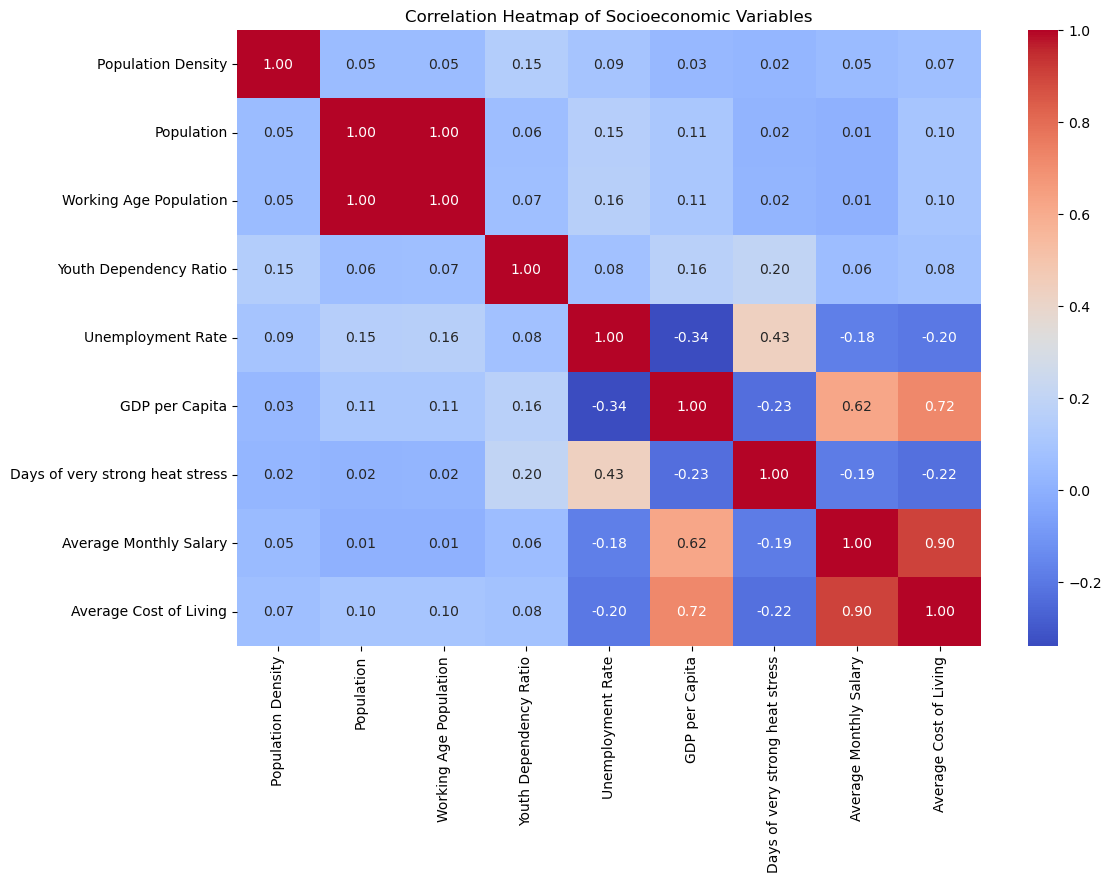

In [119]:
# Select only numerical columns
numerical_cols = [
    "Population Density",
    "Population",
    "Working Age Population",
    "Youth Dependency Ratio",
    "Unemployment Rate",
    "GDP per Capita",
    "Days of very strong heat stress",
    "Average Monthly Salary",
    "Average Cost of Living"
]

corr_data = data[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Socioeconomic Variables")
plt.show()

To explore relationships among all numerical variables in the dataset, an initial correlation heatmap was generated. Due to the large number of variables, the resulting heatmap, while informative, makes it difficult to isolate specific economic trade-offs relevant to the research question. To focus the analysis on economically meaningful relationships, a second heatmap was created using key indicators related to income, cost of living, labor market conditions, and economic output.

In [120]:
corr_cols = [
    "Average Monthly Salary",
    "Average Cost of Living",
    "Unemployment Rate",
    "GDP per Capita"
]

corr = data[corr_cols].corr()

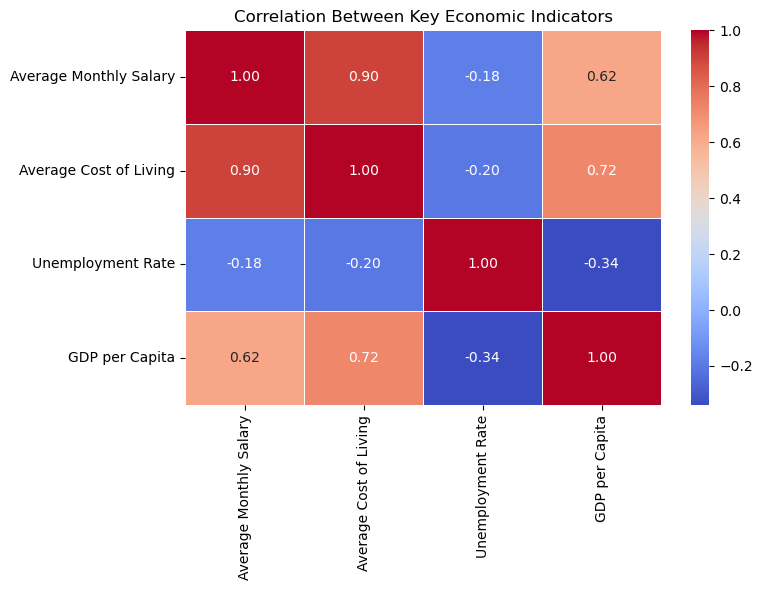

In [121]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Between Key Economic Indicators")
plt.tight_layout()
plt.show()

The correlation heatmap reveals a strong positive relationship between average monthly salary and cost of living, indicating a clear trade-off between income and affordability. GDP per capita is positively correlated with salary and negatively correlated with unemployment, suggesting that economically stronger cities tend to offer higher wages and better labor market conditions.

Countries were grouped into Northern, Southern, and Central Europe based on commonly used geographic and economic classifications to enable regional-level comparison.

In [122]:
# Add country column if not yet created
if "Country" not in data.columns:
    data["Country"] = data["City"].str.split(",").str[1].str.strip()

northern_countries = ["Sweden", "Norway", "Finland", "Denmark", "Netherlands",
                      "Belgium", "Germany", "Ireland", "UK", "Estonia", "Latvia", "Lithuania"]

southern_countries = ["Portugal", "Spain", "Italy", "Greece", "Cyprus", "Malta", "Turkiye"]

def classify_region(country):
    if country in northern_countries:
        return "North"
    elif country in southern_countries:
        return "South"
    else:
        return "Central"

data["Region"] = data["Country"].apply(classify_region)

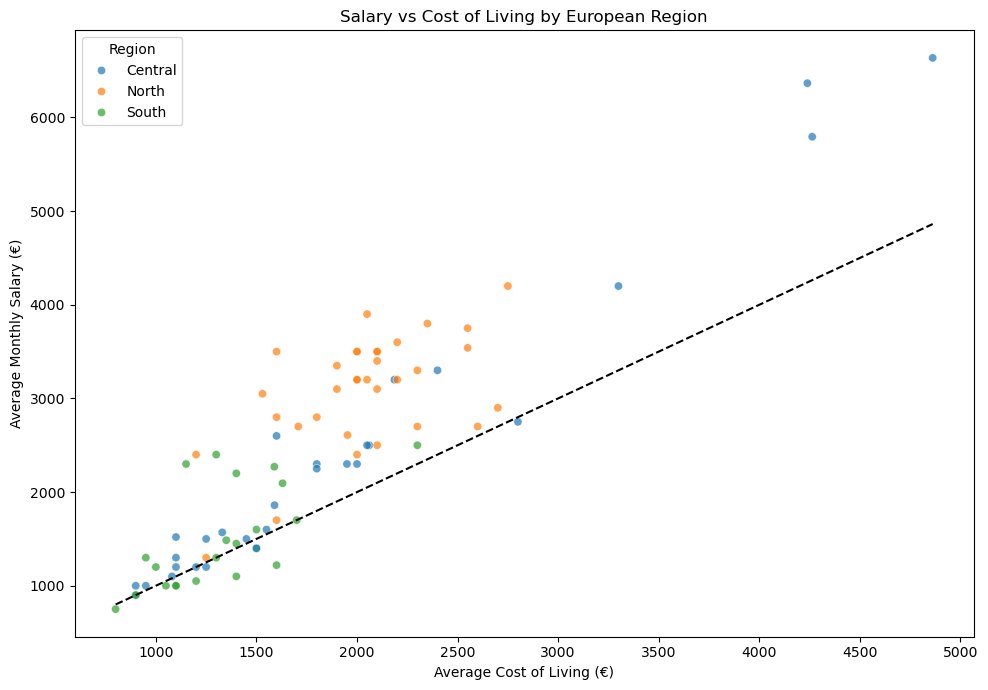

In [123]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=data,
    x="Average Cost of Living",
    y="Average Monthly Salary",
    hue="Region",
    alpha=0.7
)

plt.plot(
    [data["Average Cost of Living"].min(), data["Average Cost of Living"].max()],
    [data["Average Cost of Living"].min(), data["Average Cost of Living"].max()],
    linestyle="--",
    color="black"
)

plt.xlabel("Average Cost of Living (€)")
plt.ylabel("Average Monthly Salary (€)")
plt.title("Salary vs Cost of Living by European Region")
plt.tight_layout()
plt.show()

Northern European cities generally occupy the upper-right quadrant of the plot, indicating higher salaries paired with higher living costs. Southern European cities tend to cluster in the lower-left region, reflecting lower salaries but also lower costs. Central European cities show greater dispersion, suggesting a wider range of affordability outcomes. This highlights a regional trade-off between income potential and living expenses across Europe.

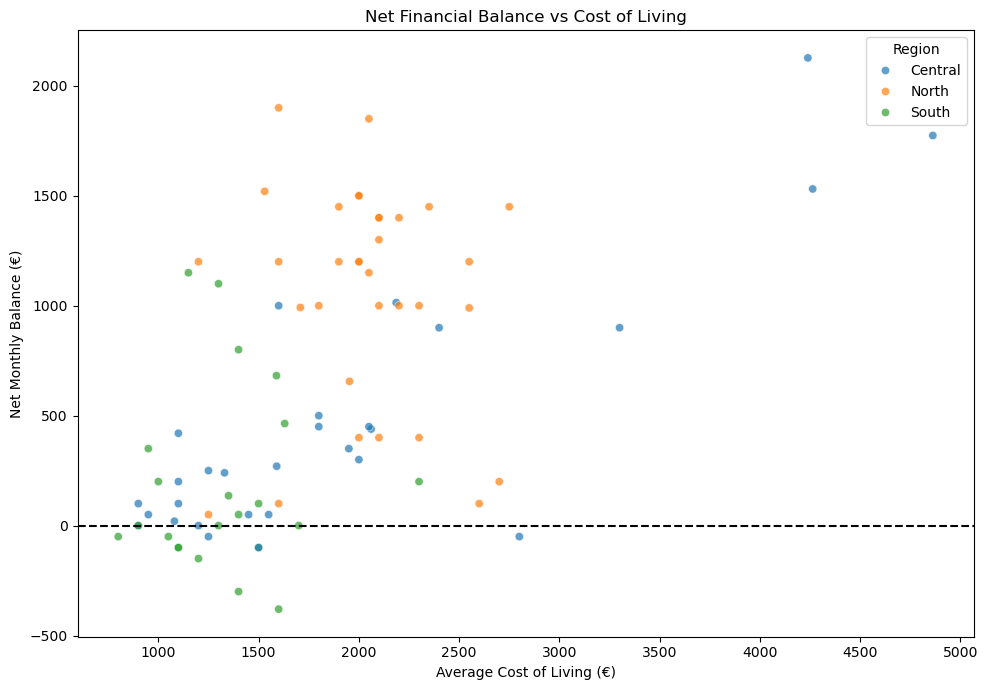

In [124]:
data["Net_Balance"] = (data["Average Monthly Salary"] - data["Average Cost of Living"])

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=data,
    x="Average Cost of Living",
    y="Net_Balance",
    hue="Region",
    alpha=0.7
)

plt.axhline(0, linestyle="--", color="black")
plt.xlabel("Average Cost of Living (€)")
plt.ylabel("Net Monthly Balance (€)")
plt.title("Net Financial Balance vs Cost of Living")
plt.tight_layout()
plt.show()

The net financial balance highlights whether higher salaries effectively compensate for higher living costs. While some high-cost cities offer correspondingly high salaries, several cities with moderate living costs achieve higher net balances, indicating better overall affordability. This demonstrates that higher income does not necessarily translate into greater financial advantage.